Initial data processing

CodeOp individual project

March 2024

In [70]:
import plotly.io as pio
pio.renderers.default = 'notebook'

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [72]:
PowerBI_df = pd.read_csv("Gen_Data/data_improved_including DE_AWS.csv")
SF_df = pd.read_csv("Gen_Data/Grad_attendance_info.xls.csv")

In [73]:
SF_df.head()

,Cohort Name_SF,Learner Name,Original Risk Level,Risk Level,Graduation Date,Days Since Cohort Graduation,Total Attendance Taken,Total Days Absent,Total Days Late,Average Score - Soft Skills,Average Score - Technical Skills
0,KST NAT1,Ahmed Yusuf,To Be Identified,To Be Identified,04/09/2021,1059,0,0,0,NaN,NaN
1,KST NAT1,Kayla Fullick,To Be Identified,To Be Identified,04/09/2021,1059,0,0,0,NaN,NaN
2,KST NAT1,Sadie Jones,To Be Identified,To Be Identified,04/09/2021,1059,0,0,0,NaN,NaN
3,KST NAT1,Ellis Arnold,To Be Identified,To Be Identified,04/09/2021,1059,0,0,0,NaN,NaN
4,KST NAT1,Ahad Ali,To Be Identified,To Be Identified,04/09/2021,1059,0,0,0,NaN,NaN


In [74]:
SF_df.rename(columns={"Learner Name":"LearnerName"}, inplace=True)

In [75]:
SF_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Cohort Name_SF                    4810 non-null   object 
 1   LearnerName                       4810 non-null   object 
 2   Original Risk Level               4475 non-null   object 
 3   Risk Level                        4810 non-null   object 
 4   Graduation Date                   4810 non-null   object 
 5   Days Since Cohort Graduation      4810 non-null   int64  
 6   Total Attendance Taken            4810 non-null   int64  
 7   Total Days Absent                 4810 non-null   int64  
 8   Total Days Late                   4810 non-null   int64  
 9   Average Score - Soft Skills       1467 non-null   float64
 10  Average Score - Technical Skills  1467 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 413.5+ KB


In [76]:
PowerBI_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 54 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ProgramName                            2851 non-null   object 
 1   Cohort_name                            2851 non-null   object 
 2   Student_ID                             2851 non-null   int64  
 3   LearnerName                            2851 non-null   object 
 4   Age_at_application                     2840 non-null   float64
 5   areaLocal                              2549 non-null   object 
 6   asylumSeeker                           2162 non-null   object 
 7   Barriers value                         2851 non-null   int64  
 8   birthDate                              2846 non-null   object 
 9   Cohort_City                            2713 non-null   object 
 10  Current_Employer_Name                  1407 non-null   object 
 11  Curr

In [77]:
# merged_df = PowerBI_df.join(SF_df, on="LearnerName")

gen_df = pd.merge(PowerBI_df, SF_df, left_on='LearnerName', right_on='LearnerName')

In [78]:
gen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2602 entries, 0 to 2601
Data columns (total 64 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ProgramName                            2602 non-null   object 
 1   Cohort_name                            2602 non-null   object 
 2   Student_ID                             2602 non-null   int64  
 3   LearnerName                            2602 non-null   object 
 4   Age_at_application                     2591 non-null   float64
 5   areaLocal                              2298 non-null   object 
 6   asylumSeeker                           1971 non-null   object 
 7   Barriers value                         2602 non-null   int64  
 8   birthDate                              2597 non-null   object 
 9   Cohort_City                            2460 non-null   object 
 10  Current_Employer_Name                  1274 non-null   object 
 11  Curr

In [79]:
gen_df= pd.read_csv("Gen_Data/GenData_ANONYMISED_Feb2024 - Export.csv")

In [80]:
gen_df.head()

,ProgramName,Cohort_name,Student_ID,Age_at_application,appliedBefore,areaLocal,asylumSeeker,Barriers value,birthDate,Cohort_City,...,postCode,PostGenAspirationPosition,refugeeStat,religion,sexualityInfo,socioeconStatus,socioeconStatusMap,Unemployment_length,wellbeingConfidence,WellbeingConfidenceBaseline
0,ACC - IT Support,ACC-ITS-X1-BLM,582763,25.0,Yes,I live in a different area,No,4,1995-12-28,Nationwide,...,SS155LT,An entry-level position (typically for 0-1 yea...,No,"Christian (including Church of England, Cathol...",Heterosexual (straight),Modern professional & traditional professional...,Professional backgrounds,Not applicable,NaN,NaN
1,ACC - IT Support,ACC-ITS-X1-BLM,579826,44.0,Yes,I live in a different area,No,3,1977-03-17,Nationwide,...,BB88DW,An entry-level position (typically for 0-1 yea...,No,Choose not to say,Heterosexual (straight),Small business owners who employed less than 2...,Intermediate backgrounds,Not applicable,NaN,NaN
2,ACC - IT Support,ACC-ITS-X1-BLM,577847,29.0,Yes,London Region - Tower Hamlets,No,4,1992-07-24,Nationwide,...,E33BS,An entry-level position (typically for 0-1 yea...,No,Muslim,Heterosexual (straight),Small business owners who employed less than 2...,Intermediate backgrounds,Not applicable,NaN,NaN
3,ACC - IT Support,ACC-ITS-X1-BLM,595952,53.0,Yes,London Region - Havering,No,2,1968-10-06,Nationwide,...,RM113AS,An intermediate level position (typically 1-3 ...,No,Muslim,Heterosexual (straight),Modern professional & traditional professional...,Professional backgrounds,Not applicable,NaN,NaN
4,ACC - IT Support,ACC-ITS-X1-BLM,595718,39.0,Yes,West Midlands Region - Walsall,No,1,1982-04-18,Nationwide,...,WS33HW,A first-level management position (typically 5...,No,"Christian (including Church of England, Cathol...",Heterosexual (straight),Modern professional & traditional professional...,Professional backgrounds,Not applicable,NaN,NaN


In [81]:
gen_df.columns

Index(['ProgramName', 'Cohort_name', 'Student_ID', 'Age_at_application',
       'appliedBefore', 'areaLocal', 'asylumSeeker', 'Barriers value',
       'birthDate', 'Cohort_City', 'Current_Employer_Name',
       'Current_placement_aligned_to_training', 'Current_position',
       'education', 'Education level', 'educationStatusAtApplication',
       'Employer_Name_1', 'Employment_Status', 'employmentAttemptPreGen',
       'employmentHoursPreGen', 'employmentIndustryPreGen',
       'employmentSatisfactionPreGen', 'employmentStatusPreGen',
       'employmentTypePreGen', 'englishFirstLanguage', 'Ethnicity_Group',
       'Financial_Situation_PostGen', 'financialSituationPreGen',
       'First_placement_by_gen', 'First_Placement_Date', 'gender',
       'has_degree', 'Has_dependents', 'has_not_entry_level_ambition',
       'has_worked_5+_years', 'IMD_decile', 'Is_30_or_over', 'Is_disabled',
       'is_EAL', 'is_ethnic_minority', 'is_IE_EU_citizen', 'is_LGBTQ+',
       'is_lone_parent', 'is_low

In [82]:
gen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321 entries, 0 to 1320
Data columns (total 58 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ProgramName                            1321 non-null   object 
 1   Cohort_name                            1321 non-null   object 
 2   Student_ID                             1321 non-null   int64  
 3   Age_at_application                     1311 non-null   float64
 4   appliedBefore                          622 non-null    object 
 5   areaLocal                              1233 non-null   object 
 6   asylumSeeker                           960 non-null    object 
 7   Barriers value                         1321 non-null   int64  
 8   birthDate                              1317 non-null   object 
 9   Cohort_City                            1240 non-null   object 
 10  Current_Employer_Name                  533 non-null    object 
 11  Curr

[['ProgramName', 'Cohort_name', 'Student_ID', 'Age_at_application',
       'appliedBefore', 'areaLocal', 'asylumSeeker', 'Barriers value',
       'birthDate', 'Cohort_City', 'Current_Employer_Name',
       'Current_placement_aligned_to_training', 'Current_position',
       'education', 'Education level', 'educationStatusAtApplication',
       'Employer_Name_1', 'Employment_Status', 'employmentAttemptPreGen',
       'employmentHoursPreGen', 'employmentIndustryPreGen',
       'employmentSatisfactionPreGen', 'employmentStatusPreGen',
       'employmentTypePreGen', 'englishFirstLanguage', 'Ethnicity_Group',
       'Financial_Situation_PostGen', 'financialSituationPreGen',
       'First_placement_by_gen', 'First_Placement_Date', 'gender',
       'has_degree', 'Has_dependents', 'has_not_entry_level_ambition',
       'has_worked_5+_years', 'IMD_decile', 'Is_30_or_over', 'Is_disabled',
       'is_EAL', 'is_ethnic_minority', 'is_IE_EU_citizen', 'is_LGBTQ+',
       'is_lone_parent', 'is_low_socio_econ', 'is_unempl_12+_mths',
       'is_unemployed_pre_gen', 'is_unsatisfied_empl_pre_gen',
       'learnerSpecialNeedsDetails', 'postCode', 'PostGenAspirationPosition',
       'refugeeStat', 'religion', 'sexualityInfo', 'socioeconStatus',
       'socioeconStatusMap', 'Unemployment_length', 'wellbeingConfidence',
       'WellbeingConfidenceBaseline']]

In [83]:
gen_df["learnerSpecialNeedsDetails"].value_counts()

learnerSpecialNeedsDetails
No                                                                                                                                                                                               23
Dyslexia                                                                                                                                                                                         19
Not applicable                                                                                                                                                                                   14
NONE                                                                                                                                                                                              9
Depression                                                                                                                                                                                   

NOTE: Text analysis could be good for the following features:
- learnerSpecialNeedsDetails
- 

<Axes: xlabel='Barriers value', ylabel='Count'>

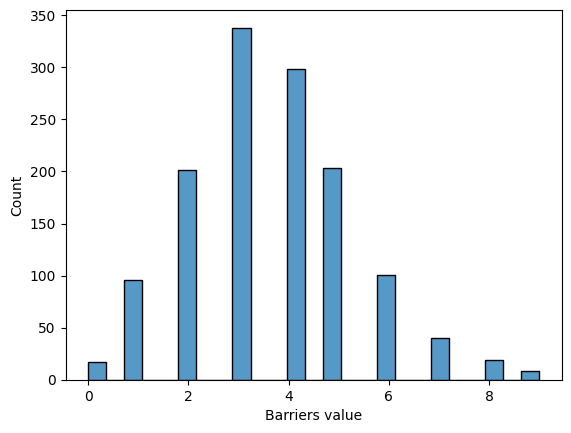

In [84]:
sns.histplot(data= gen_df, x="Barriers value")

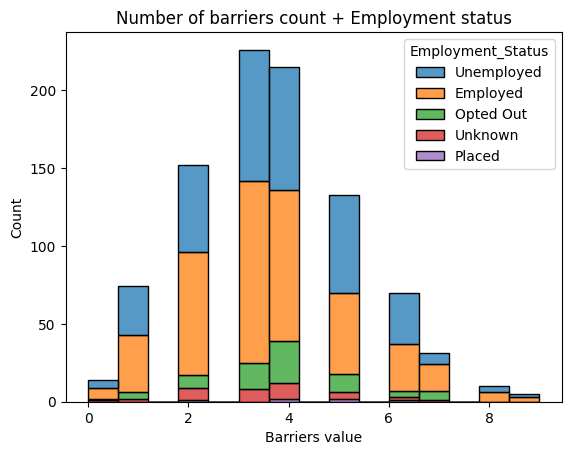

In [85]:
sns.histplot(data= gen_df, 
             x="Barriers value", 
             hue="Employment_Status",
             multiple="stack")

plt.title("Number of barriers count + Employment status")
plt.show()

In [86]:
gen_df["Employment_Status"].value_counts()

Employment_Status
Employed      445
Unemployed    364
Opted Out      79
Unknown        36
Placed          6
Name: count, dtype: int64

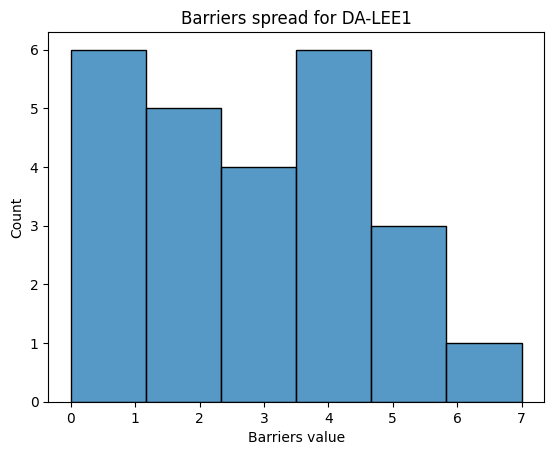

In [87]:
sns.histplot(gen_df[gen_df["Cohort_name"] == "DA-LEE1"], x= "Barriers value")
plt.title("Barriers spread for DA-LEE1")
plt.show()

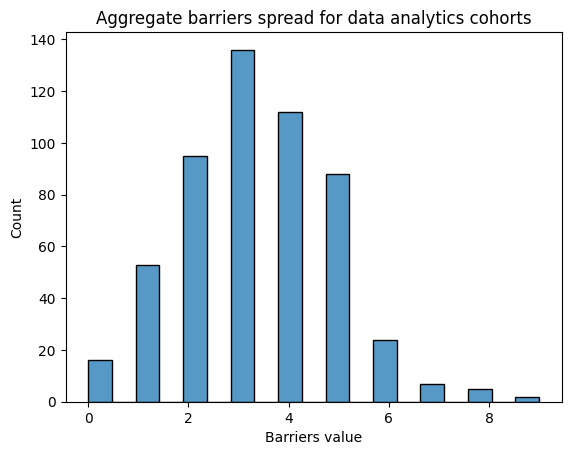

In [88]:
sns.histplot(gen_df[gen_df["ProgramName"] == "Data Analytics"], x= "Barriers value")
plt.title("Aggregate barriers spread for data analytics cohorts")
plt.show()

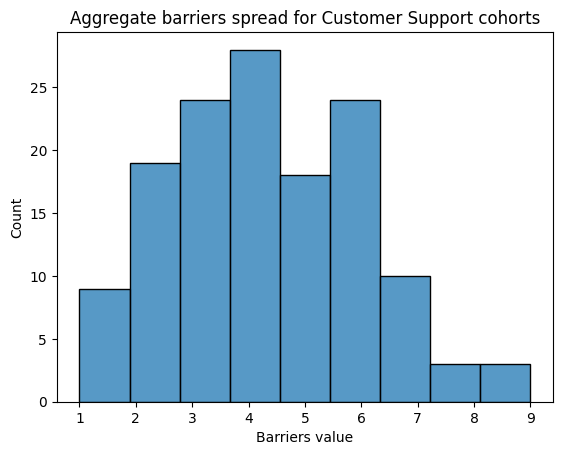

In [89]:
sns.histplot(gen_df[gen_df["ProgramName"] == "Customer Support"], x= "Barriers value")
plt.title("Aggregate barriers spread for Customer Support cohorts")
plt.show()

Text(0.5, 1.0, 'Number of barriers count + Programme name')

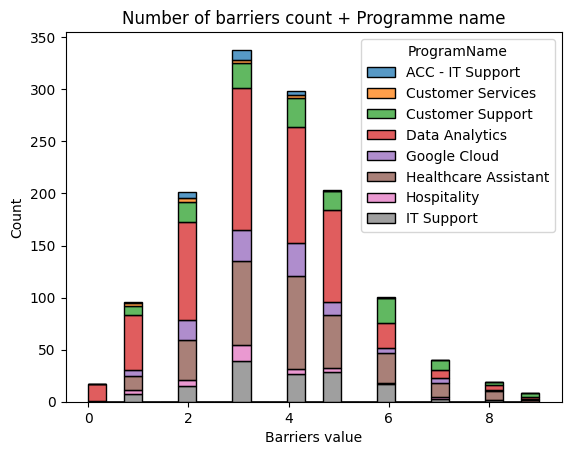

In [90]:
sns.histplot(data= gen_df, 
             x="Barriers value", 
             hue="ProgramName",
             multiple="stack")

plt.title("Number of barriers count + Programme name")

In [91]:
total_EAL = gen_df["is_EAL"][gen_df["is_EAL"]==1].count()
total_EAL

510

Text(0.5, 1.0, 'Employment status count + EAL')

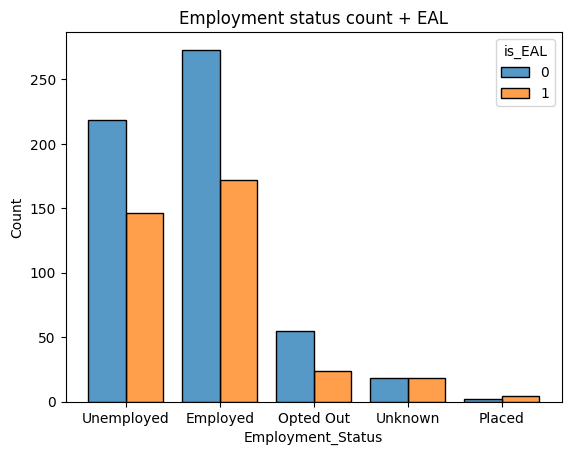

In [92]:
# How does EAL relate to post-bootcamp placement?


sns.histplot(data= gen_df, 
             x="Employment_Status", 
             hue="is_EAL",
             multiple="dodge",
             shrink=.8)

plt.title("Employment status count + EAL")

Text(0.5, 1.0, 'Employment status count + EAL')

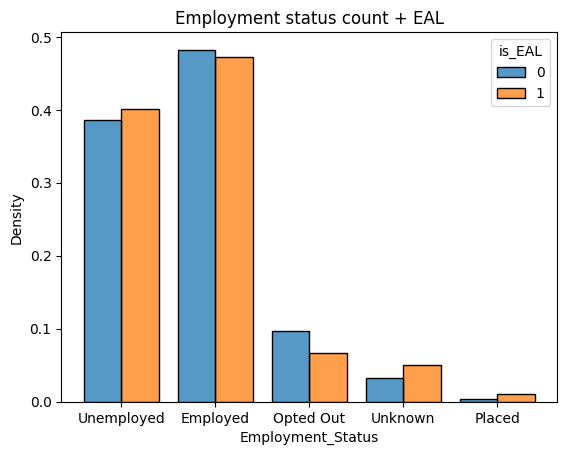

In [93]:
# How does EAL relate to post-bootcamp placement?


sns.histplot(data= gen_df, 
             x="Employment_Status", 
             hue="is_EAL",
             multiple="dodge",
             stat="density",
             common_norm=False,
             shrink=.8)

plt.title("Employment status count + EAL")

Text(0.5, 1.0, 'Employment status count + EAL')

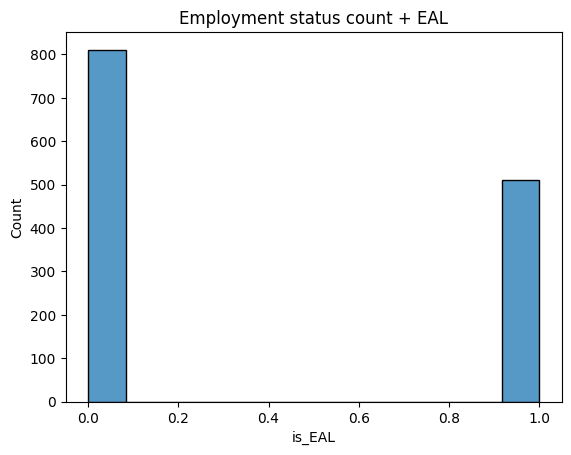

In [94]:
sns.histplot(data= gen_df, 
             x="is_EAL")

plt.title("Employment status count + EAL")

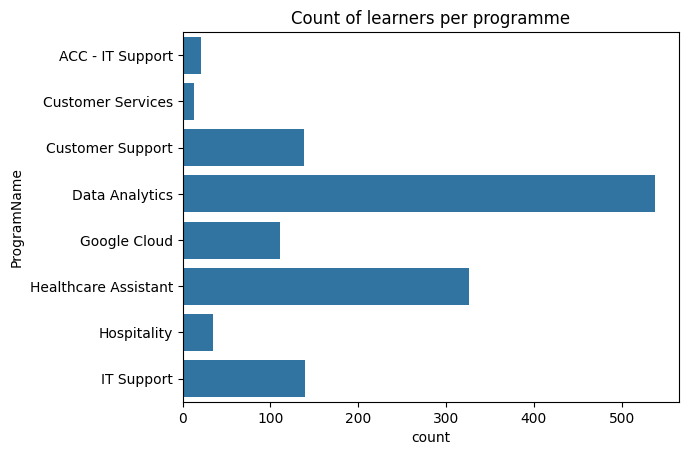

In [95]:
sns.countplot(y=gen_df["ProgramName"])
plt.title("Count of learners per programme")
plt.show()

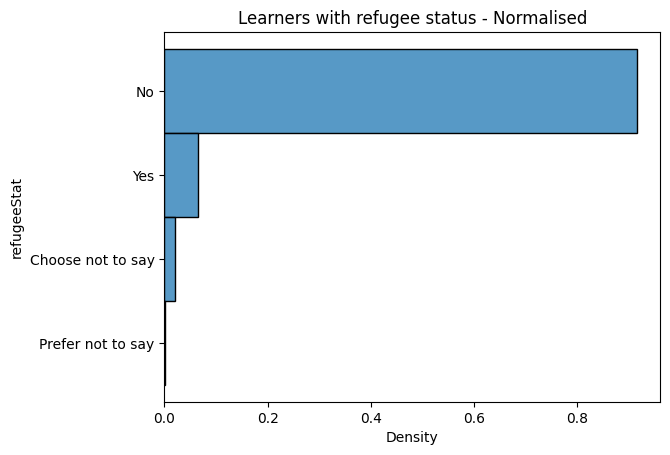

In [96]:
sns.histplot(y=gen_df["refugeeStat"],
             stat="density",
             common_norm=False)
plt.title("Learners with refugee status - Normalised")
plt.show()

# Less than 10% of learners state report they have refugee status

In [97]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [98]:
@interact
def describe_col(column=list(gen_df.columns)):
    print(gen_df[column].describe())

interactive(children=(Dropdown(description='column', options=('ProgramName', 'Cohort_name', 'Student_ID', 'Age…

In [99]:
gen_df["gender"].replace(to_replace=["Other/Prefer to self describe",
                                           "Other",
                                           "Non-binary",
                                           "Trans man",
                                           "Choose not to identify"],
                               value= "Other",
                               inplace=True)

In [100]:
gen_df["Employment_Status"].replace(to_replace="Placed",
                               value= "Employed",
                               inplace=True)

In [101]:
# Cleaning is_lone_parent

gen_df["is_lone_parent"].fillna(0, inplace=True)

In [102]:
# Cleaning Education Level in a way that maintains ordinality:

gen_df["Education level"].replace(to_replace=["Level 1",
                                           "Level 2",
                                           "Level 3",
                                           "Level 4",
                                           "Level 5",
                                           "Level 6",
                                           "Level 7",
                                           "Level 8",
                                           "Entry level",
                                           "Other"
                                          ],
                               value= [1, 2, 3, 4, 5, 6, 7, 8, None, None],
                               inplace=True)

In [103]:
gen_df["Education level"].isna().sum()

78

In [104]:
gen_df.dropna(subset="Education level", inplace=True, axis=0)

In [105]:
gen_df["Education level"].isna().sum()

0

In [106]:
# Cleaning Has_dependents:

gen_df["Has_dependents"].fillna(0, inplace=True)

In [107]:
# Cleaning Age at application:

gen_df["Age_at_application"].fillna(gen_df["Age_at_application"].median(), inplace=True)

In [109]:
@interact
def histplot_col(column=list(gen_df.columns)):
    sns.histplot(y=gen_df[column],
             stat="density",
             common_norm=False)
    
    plt.title(f"Histogram of {column}")
    plt.show()

interactive(children=(Dropdown(description='column', options=('ProgramName', 'Cohort_name', 'Student_ID', 'Age…

Text(0.5, 1.0, 'Employment status count + Education level')

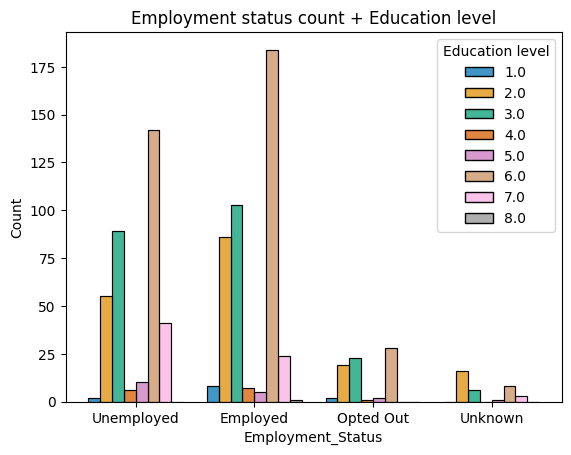

In [110]:
# How does education level relate to post-bootcamp placement?


sns.histplot(data= gen_df, 
             x="Employment_Status", 
             hue="Education level",
             multiple="dodge",
             common_norm=False,
             shrink=.8,
             palette="colorblind")

plt.title("Employment status count + Education level")

People with L7 education are more often unemployed post-programme. This is different than the other educational categories and surprising since one might assume having more education will result in a higher chance of getting employed.

In [111]:
list(pd.unique(gen_df["Education level"].values))

[6.0, 3.0, 2.0, 4.0, 7.0, 5.0, 8.0, 1.0]

In [112]:
@interact

def histplot_barriers_edu(val = list(pd.unique(gen_df["Education level"].values))):
    sns.histplot(data= gen_df[gen_df["Education level"] == val], 
            y="Barriers value",
            hue="is_EAL",
            multiple="dodge",
            common_norm=False,
            shrink=.8,
            palette="colorblind"
            )
    plt.title("Do people with EAL tend to have more barriers? Filter based on education level")
    plt.show()

interactive(children=(Dropdown(description='val', options=(6.0, 3.0, 2.0, 4.0, 7.0, 5.0, 8.0, 1.0), value=6.0)…

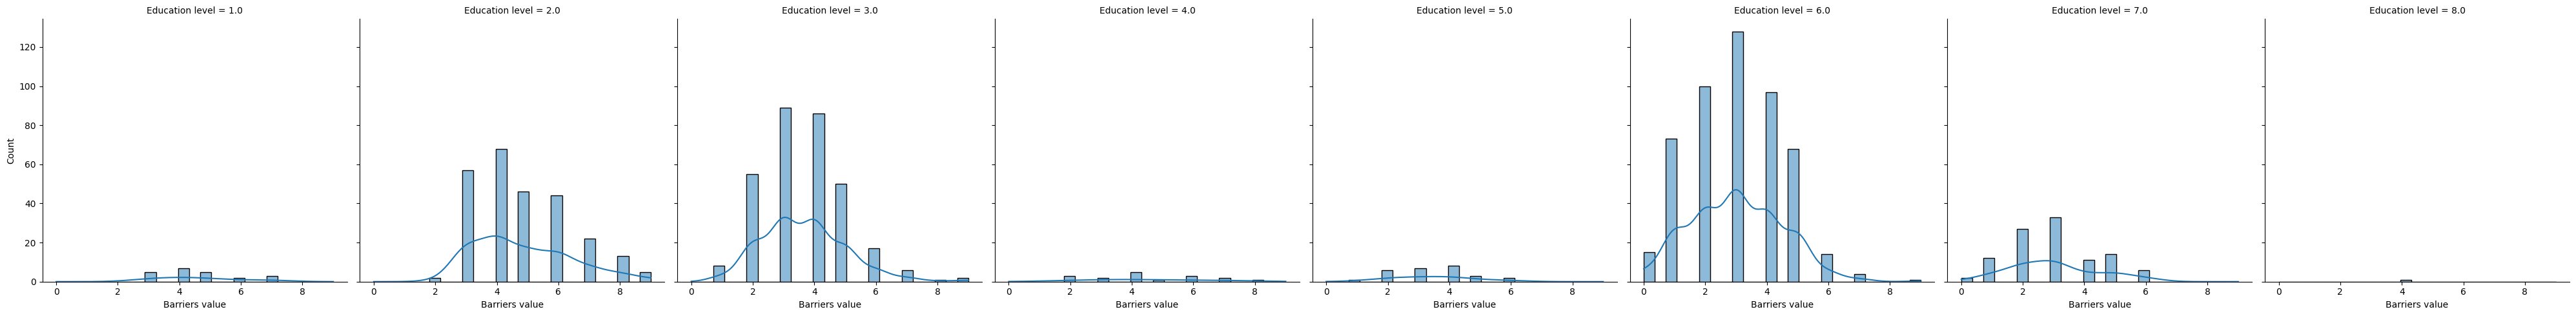

In [113]:
sns.displot(data=gen_df,
            x="Barriers value",
            col="Education level",
            kde=True)

plt.show()

In [115]:
@interact
def histplot_col(column=list(gen_df.columns)):
    sns.histplot(y=gen_df[column],
             hue=gen_df["IMD_decile"],
             multiple="dodge",
             shrink=.8
            )
    
    plt.title(f"Histogram of {column}")
    plt.show()

interactive(children=(Dropdown(description='column', options=('ProgramName', 'Cohort_name', 'Student_ID', 'Age…

In [ ]:
['Cohort_name', 'Student_ID', ,
                 'areaLocal', 'Barriers value', 'Cohort_City', 
                 'Current_Employer_Name', 'Current_position','education', 
                 'educationStatusAtApplication','Employment_Status', 
                 'employmentAttemptPreGen','employmentHoursPreGen', 'employmentIndustryPreGen','employmentSatisfactionPreGen', 'employmentStatusPreGen',
                 'employmentTypePreGen', 'englishFirstLanguage', 'Ethnicity_Group',
                 'Financial_Situation_PostGen', 'financialSituationPreGen', 
                 'First_Placement_Date','has_degree', 'Has_dependents', ,
                 'has_worked_5+_years', 'IMD_decile', 'Is_30_or_over', 'Is_disabled','is_EAL', 'is_ethnic_minority', 'is_IE_EU_citizen', 'is_LGBTQ+',
                 'is_lone_parent', 'is_low_socio_econ', 'is_unempl_12+_mths','is_unemployed_pre_gen', 'is_unsatisfied_empl_pre_gen',
                 'learnerSpecialNeedsDetails', 'postCode', 'PostGenAspirationPosition','refugeeStat', 'religion', 'sexualityInfo', 'socioeconStatus',
                 'socioeconStatusMap', 'Unemployment_length', 'wellbeingConfidence','WellbeingConfidenceBaseline']

Cleaning still needed:
- Clean 'Education level' feature
- Check gender feature (done, options are now male, female, other)
- What is the difference between wellbeingconfidence and wellbeing confidence baseline?
- Clean employment status feature (Done, replaced "placed" with "Employed")
- Find more continuous data (number of absences, transition tracker scores, grade for PL900 for DA, number of safeguarding concerns, 2021_job_density of the region they live in
- Deal with education level imputation

Questions:
- Can I do PCA and will it be useful if I have mostly categorical data that is one hot encoded?

In [ ]:
# Trialing PCA with the barriers information I have

# I am not including employment status in this, I want to see if the principal components that are uncovered correlate at all to employment.

X = gen_df[['ProgramName', 
                  'Cohort_City',
                  "Barriers value",
                  'Age_at_application', 
                  'Education level', 
                  'gender', 
                  'Has_dependents',
                  'Is_disabled',
                  'is_EAL',
                  'is_lone_parent', 
                  'refugeeStat',
                  'socioeconStatusMap',
                  'Unemployment_length',
                 ]]
                  

In [ ]:
# Do one hot encoding
X = pd.get_dummies(X)

In [ ]:
X.info()

I should not do PCA on a dataset that is mostly categorical features, I need to decide how else I will analyse data

In [ ]:
# standardise and scale the data ahead of pca:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_data = scale.fit_transform(X)
scaled_data

In [ ]:
# now we need to convert the array back into a dataframe:
column_names = X.columns.to_list()
scaled_dataframe_X=pd.DataFrame(scaled_data, columns= column_names) 

In [ ]:
# Use daat.describe() to make sure the standardisation and scaling worked
scaled_dataframe_X.describe()

In [ ]:
scaled_dataframe_X.isna().sum()

In [ ]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=4)

In [ ]:
PCA_components = pca_model.fit_transform(scaled_dataframe_X)

# Now print the explained variance ratio which is an attriburte of the model object:
print(pca_model.explained_variance_ratio_)

In [ ]:
# For the variable pca_components, put this into a dataframe such that there are 4 columns called PC1, PC2, PC3 and PC4.
pca_dataframe = pd.DataFrame(PCA_components, columns=["PC1", "PC2", "PC3", "PC4"])

In [ ]:
# Plot a scatter plot of the first two principal using the dataframe that you created above.
import seaborn as sns
import matplotlib.pyplot as plt

plt.title("Principal components 1 and 2")
sns.scatterplot(data=pca_dataframe, 
                x="PC1", 
                y="PC2")
plt.show()

In [ ]:
# Challenge: Using the first two principal components, can you use Hierarchical Clustering to get the appropriate amount of clusters?
import scipy
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt


## Step 1: Use PC1 and PC2 for hierarchical clustering.
clusters = hierarchy.linkage(pca_dataframe[["PC1", "PC2"]], method="complete")

## Step 2: Show the dendrogram.
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(clusters)
plt.show()

## Step 3: Perform Hierarchical Clustering using your chosen amount of clusters.
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=3)
Y_preds = clustering.fit_predict(pca_dataframe[["PC1", "PC2"]])

pca_dataframe["predicted_hierarchical_cluster"] = Y_preds

## Step 4: Plot the hierarchical clustering results. Do they make sense?
sns.scatterplot(
    data = pca_dataframe,
    x = "PC1",
    y = "PC2",
    hue = "predicted_hierarchical_cluster"
)

In [ ]:
gen_df["Days Since Cohort Graduation"].isna().sum()

In [ ]:
 60  Total Days Absent                      2602 non-null   int64  
 61  Total Days Late                        2602 non-null   int64  
 62  Average Score - Soft Skills            1332 non-null   float64
 63  Average Score - Technical Skills   

In [ ]:
sns.relplot(y="Total Days Absent",
            x="Average Score - Technical Skills",
            data=gen_df,
            kind="scatter",
            col="Employment_Status")

In [ ]:
sns.catplot(data=gen_df,
            kind="bar",
            x="Employment_Status",
            y="Average Score - Technical Skills",
            hue="is_EAL"
           )
plt.title("Tech scores by employment status")
plt.show()

In [ ]:
sns.catplot(data=gen_df,
            kind="bar",
            x="Employment_Status",
            y="Total Days Absent",
            hue="is_EAL"
           )
plt.title("Total days absent by employment status")
plt.show()

In [ ]:
gen_df["Graduation Date"].head()

In [ ]:
gen_df["First_Placement_Date"] = pd.to_datetime(gen_df["First_Placement_Date"], format= "%Y-%m-%d")

In [ ]:
gen_df["Graduation Date"] = pd.to_datetime(gen_df["Graduation Date"], format= "%m/%d/%Y")

In [ ]:
gen_df["Search_duration"] = gen_df["First_Placement_Date"] - gen_df["Graduation Date"]

In [ ]:
gen_df["Search_duration"].head()

In [ ]:
Search_duration_noNaN = gen_df["Search_duration"].dropna()
Search_duration_noNaN_int = Search_duration_noNaN.dt.days


x_temp=Search_duration_noNaN_int[Search_duration_noNaN_int >= 0]
sns.histplot(x=x_temp,
            bins=20)

plt.show()
    

In [ ]:
gen_df["Search_duration"] = gen_df["Search_duration"].dt.days

In [ ]:
gen_df["Search_duration"].head()

In [ ]:
gen_df["ProgramName"].value_counts()

In [ ]:
# Distribution of grads per programme and how many are EAL vs non-EAL:

@interact
def EAL_grads_per_programme_hist(Prog_name=gen_df["ProgramName"].value_counts().index.tolist()):
    sns.histplot(x=gen_df["is_EAL"][gen_df["ProgramName"]==Prog_name],
                bins=20,
                palette="pastel"
               )

    plt.title("Number of EAL vs non-EAL grads")
    plt.show()

In [ ]:
@interact
def search_duration_hist(Prog_name=gen_df["ProgramName"].value_counts().index.tolist()):
    sns.displot(x=gen_df["Search_duration"][(gen_df["Search_duration"]>=0.0) & (gen_df["ProgramName"]==Prog_name)],
                bins=20,
                kde=True,
                hue=gen_df["is_EAL"],
                palette="pastel"
               )

    plt.title("Job search duration for Employed graduates")
    plt.show()

In [ ]:
sns.displot(x=gen_df["Search_duration"][(gen_df["Search_duration"]>=0.0)],
            bins=30,
            kde=True,
            stat="density",
            common_norm=False,
            row=gen_df["ProgramName"]
           )
plt.show()

In [ ]:
# How does EAL relate to post-bootcamp placement?

@interact
def EAL_by_program_hist(Prog_name=gen_df["Cohort_name"].value_counts().index.tolist()):
    
    sns.histplot(data= gen_df[gen_df["Cohort_name"]==Prog_name], 
                 x="Employment_Status", 
                 hue="is_EAL",
                 multiple="dodge",
                 # stat="density",
                 # common_norm=False,
                 shrink=.8)
    
    plt.title("Employment status count + EAL")

In [ ]:
gen_df_numeric.columns

In [ ]:
# Create a correlation heatmap
gen_df_numeric = gen_df.select_dtypes(include=np.number)
gen_df_numeric= gen_df_numeric[['Age_at_application', 'Barriers value',
                               'Current_placement_aligned_to_training', 'Education level', 'First_placement_by_gen', 'Has_dependents','IMD_decile', 'Is_disabled', 'is_EAL', 'is_ethnic_minority',
                               'is_LGBTQ+', 'is_lone_parent', 'is_low_socio_econ', 'Job_start_speed',
                               'Days Since Cohort Graduation', 'Total Attendance Taken',
                               'Total Days Absent', 'Total Days Late', 'Average Score - Soft Skills',
                               'Average Score - Technical Skills', 'Search_duration']]

gen_data_matrix = gen_df_numeric.corr()
sns.heatmap(gen_data_matrix, 
            cmap='coolwarm',
            center=0)

plt.figure(figsize=(30, 30))
plt.show()

In [ ]:
sns.scatterplot(x=gen_df["Search_duration"][(gen_df["Search_duration"]>=0.0)],
                y=gen_df["Average Score - Soft Skills"][(gen_df["Average Score - Soft Skills"]>0.0)],
           )
plt.show()

In [ ]:
sns.stripplot(data=gen_df[gen_df["Employment_Status"]!="Internship"],
            x="Employment_Status",
            y="Average Score - Soft Skills",
            jitter=True
           )

plt.show()

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(15,10))

sns.stripplot(data=gen_df[gen_df["Employment_Status"]!="Internship"], 
              x="Employment_Status",
              y="Average Score - Soft Skills",
              size= 3, 
              jitter=0.35, 
              ax=axs)

sns.boxplot(data=gen_df[gen_df["Employment_Status"]!="Internship"], 
            x="Employment_Status",
            y="Average Score - Soft Skills",
            ax=axs, 
            meanprops={'visible': True, 'color': 'r', 'ls': '-', 'lw': 2},
            medianprops={'visible': True, 'color': 'k', 'ls': '-', 'lw': 2}, whiskerprops={'visible': False}, 
            showmeans=True, meanline=True, showfliers=False, showbox=False, showcaps=False, zorder=10
           )

plt.show()

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(15,10))

sns.stripplot(data=gen_df[gen_df["Employment_Status"]!="Internship"], 
              x="Employment_Status",
              y="Total Days Absent",
              size= 7, 
              jitter=0.35, 
              ax=axs)

sns.boxplot(data=gen_df[gen_df["Employment_Status"]!="Internship"], 
            x="Employment_Status",
            y="Total Days Absent",
            ax=axs, 
            meanprops={'visible': True, 'color': 'r', 'ls': '-', 'lw': 2},
            medianprops={'visible': True, 'color': 'k', 'ls': '-', 'lw': 2}, whiskerprops={'visible': False}, 
            showmeans=True, meanline=True, showfliers=False, showbox=False, showcaps=False, zorder=10
           )

plt.show()

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

In [ ]:
text = " ".join(i for i in gen_df["learnerSpecialNeedsDetails"].astype(str))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
gen_df.info()

In [ ]:
gen_df["Enrolment_Status"].value_counts()

In [ ]:
gen_df["Risk Level"].value_counts()

In [ ]:
gen_df["Original Risk Level"].value_counts()

In [69]:
# Lets try converting some data into a categorical datatype:

from pandas.api.types import CategoricalDtype
risk_levels = CategoricalDtype(categories=["Low Risk", "Medium Risk", "High Risk", "To Be Identified"], ordered=True)

temp = gen_df["Risk Level"].astype(risk_levels)

temp.hist()

KeyError: 'Risk Level'

In [ ]:
gen_df["Risk Level"].hist()

In [ ]:
# Create a stacked bar chart:

# import libraries
import matplotlib.patches as mpatches

# set the figure size
plt.figure(figsize=(14, 14))

# from raw value to percentage
grads_per_programme_count = gen_df.groupby('ProgramName')['Student_ID'].count().reset_index()
EAL_per_programme = gen_df[gen_df["is_EAL"]==1].groupby('ProgramName')['is_EAL'].sum().reset_index()
EAL_per_programme['is_EAL'] = [i / j * 100 for i,j in zip(EAL_per_programme['is_EAL'], grads_per_programme_count['Student_ID'])]
grads_per_programme_count['Student_ID'] = [i / j * 100 for i,j in zip(grads_per_programme_count['Student_ID'], grads_per_programme_count['Student_ID'])]

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(y="ProgramName",  x="Student_ID", data=grads_per_programme_count, color='darkblue')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(y="ProgramName", x="is_EAL", data=EAL_per_programme, color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Not EAL')
bottom_bar = mpatches.Patch(color='lightblue', label='EAL')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

In [ ]:
grads_per_programme_count

In [ ]:
EAL_per_programme

In [ ]:
gen_df["is_EAL"].value_counts().index.tolist()

In [ ]:
# create a nested loop to calculate the values for the sanky diagram.

# Start with the your starting options: 0,1

# For each starting option, calculate the proportion of that option that go on to each of the options 
# in the next phase. i.e. what proportion of EAL grads go on to be "graduated", how about "drop out", etc...

# for each of these groups, determine what proportion of that group go on to each of the options in the next phase

In [ ]:
# Lets create a simple sankey diagram that plots how different genders end up in terms of employment status. 

In [34]:
#  First lest see how many gender options we have and how many employment statuses we have:

gen_df["gender"].value_counts()

gen_df["gender"].value_counts().index.tolist()

['Male', 'Female', 'Other']

In [35]:
gen_df["Employment_Status"].value_counts()
gen_df["Employment_Status"].value_counts().index.tolist()

['Employed', 'Unemployed', 'Opted Out', 'Unknown']

In [36]:
# Lets find the proportion of Male grads that are currently employed:

total_employment_statuses = gen_df["Employment_Status"].count()


count_temp = gen_df[gen_df["Employment_Status"]=="Employed"].groupby(gen_df["gender"]=="Male")["Employment_Status"].count()
count_temp = count_temp[True]
count_temp

# proportion_temp = count_temp / total_employment_statuses * 100
# proportion_temp

# For sankey do I need a count or a proportion?

184

In [62]:
source_values_str = gen_df["gender"].value_counts().index.tolist()
target_values_str = gen_df["Employment_Status"].value_counts().index.tolist()

source_keys = {x:source_values_str.index(x) for x in source_values_str}
source_keys

target_keys = {x:(source_values_str.index(x) + len(source_values_str)) for x in source_values_str}
target_keys

{'Male': 3, 'Female': 4, 'Other': 5}

In [65]:
source_1 = [] 
target_1 = [] 
value_1 = []

# For each gender determine the count of each employment status:
source_values_str = gen_df["gender"].value_counts().index.tolist()
target_values_str = gen_df["Employment_Status"].value_counts().index.tolist()

source_keys = {x:source_values_str.index(x) for x in source_values_str}
target_keys = {x:(target_values_str.index(x) + len(source_values_str)) for x in target_values_str}

for source_val in source_values_str:
    for target_val in target_values_str:
        count_temp = gen_df[gen_df["Employment_Status"]==target_val].groupby(gen_df["gender"]==source_val)["Employment_Status"].count()
        if True in count_temp:
            count_temp = count_temp[True]
            source_1.append(source_keys[source_val])
            target_1.append(target_keys[target_val])
            value_1.append(count_temp)
        

In [38]:
len(value_1)

12

In [39]:
len(target_1)

12

In [40]:
# !pip install plotly

In [41]:
import plotly.graph_objects as go

In [42]:
zipped_temp = zip(source_1, target_1, value_1)
print(list(zipped_temp))

[('Male', 'Employed', 184), ('Male', 'Unemployed', 182), ('Male', 'Opted Out', 35), ('Male', 'Unknown', 16), ('Female', 'Employed', 226), ('Female', 'Unemployed', 160), ('Female', 'Opted Out', 38), ('Female', 'Unknown', 17), ('Other', 'Employed', 7), ('Other', 'Unemployed', 3), ('Other', 'Opted Out', 2), ('Other', 'Unknown', 1)]


In [43]:
source

NameError: name 'source' is not defined

In [55]:
target_1


['Employed',
 'Unemployed',
 'Opted Out',
 'Unknown',
 'Employed',
 'Unemployed',
 'Opted Out',
 'Unknown',
 'Employed',
 'Unemployed',
 'Opted Out',
 'Unknown']

In [57]:
fig = go.Figure(data=[go.Sankey(
      node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ['Male', 'Female', 'Other', 'Employed', 'Unemployed', 'Opted Out', 'Unknown'],
      # customdata = ["Long name A1", "Long name A2", "Long name B1", "Long name B2",
      #               "Long name C1", "Long name C2"],
      # hovertemplate='Node %{customdata} has total value %{value}<extra></extra>',
      # color = "blue"
    ),
    link = dict(
      source = [0,0,0,0,1,1,1,1,2,2,2,2],
      target = [3,4,5,6,3,4,5,6,3,4,5,6],
      value = value_1,
      customdata = ["q","r","s","t","u","v"],
      # hovertemplate='Link from node %{source.customdata}<br />'+
      #   'to node%{target.customdata}<br />has value %{value}'+
      #   '<br />and data %{customdata}<extra></extra>',
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show(renderer="iframe") 
# plt.show()

In [66]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      # label = ['Male', 'Female', 'Other', 'Prefer not to say', 'Employed', 'Unemployed', 'Opted Out', 'Unknown', 'Internship'],
      color = "blue"
    ),
    link = dict(
      source = source_1,
      target = target_1,
      value = value_1,
      # hovercolor=["midnightblue", "lightskyblue", "gold", "mediumturquoise", "lightgreen", "cyan"],
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show(renderer="iframe") 

In [53]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["A1", "A2", "B1", "B2", "C1", "C2"],
      color = "blue"
    ),
    link = dict(
      source = [0, 1, 0, 2, 3, 3],
      target = [2, 3, 3, 4, 4, 5],
      value = [8, 4, 2, 8, 4, 2],
      hovercolor=["midnightblue", "lightskyblue", "gold", "mediumturquoise", "lightgreen", "cyan"],
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show(renderer="iframe") 

In [ ]:
# !pip install --upgrade plotly
# !pip install --upgrade notebook

In [67]:
gen_df["Current_Employer_Name"].head(20)

0                        NaN
2                Carpetright
3                        NaN
4                        NaN
5                        NaN
6                        NaN
7                        NaN
8                        NaN
9                        NaN
10               Carpetright
11                       NaN
12                       NaN
13                       NaN
14                       NaN
16                       NaN
17                    Dunelm
18    https://www.gb3.co.uk/
19                       NaN
21                   Unknown
22                   Jamie's
Name: Current_Employer_Name, dtype: object